# Questions
## 1) Which species are most under threat and how are they distributed across the parks?
### Goal: Identify the most vulnerable species, so the National Park Service can prioritise conservation efforts accordingly.
### Analysis Tips:
#### - Merge both datasets on scientific_name.
#### - Filter out species with a conservation status of 'No Intervention'.
#### - Group by category and conservation status, and count the unique at-risk species.
## 2) Is there a correlation between the number of observations of a species and its conservation status?
### Goal: Understand if rarer (more endangered) species are observed less frequently, which could support prioritising their monitoring.
### Analysis Tips:
#### - Use visualization (e.g. box plots, scatter plots, etc.) to explore relationships between observation frequency and conservation risk.
## 3) Is there a significant difference between organism categories under threat?
### Goal: Understand if certain organism catergories are more prioritised in conservation than others.
### Analysis Tips:
#### - Create contingency tables of the number of protected and non-protected species of two different organism categories.
#### - Perform chi-square analysis tests too see whether there is statistical significance between the number of protected organism species of different organisms.

In [249]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from itertools import combinations

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [250]:
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

# Exploratory Data Analysis/Data Wrangling, Tidying, and Cleaning

In [251]:
species['conservation_status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [252]:
species['conservation_status'].fillna('No Intervention', inplace=True)
species.head()

C:\Users\sammy\AppData\Local\Temp\ipykernel_5240\745145089.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  species['conservation_status'].fillna('No Intervention', inplace=True)


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


In [253]:
species_info = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

biodiversity = pd.merge(species_info, observations, on='scientific_name', how='inner')
biodiversity.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",NaN,Yosemite National Park,128


In [254]:
biodiversity = biodiversity.rename({'park_name': 'national_park'}, axis=1)
biodiversity.head()

,category,scientific_name,common_names,conservation_status,national_park,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",NaN,Yosemite National Park,128


In [255]:
print('Unique National Parks:')
print(f'{biodiversity['national_park'].unique()}')

Unique National Parks:
['Bryce National Park' 'Yellowstone National Park'
 'Great Smoky Mountains National Park' 'Yosemite National Park']


In [256]:
biodiversity['national_park'] = biodiversity['national_park'].replace('Bryce National Park', 'Bryce')
biodiversity['national_park'] = biodiversity['national_park'].replace('Yellowstone National Park', 'Yellowstone')
biodiversity['national_park'] = biodiversity['national_park'].replace('Great Smoky Mountains National Park', 'Great Smoky Mountains')
biodiversity['national_park'] = biodiversity['national_park'].replace('Yosemite National Park', 'Yosemite')
biodiversity.head()

,category,scientific_name,common_names,conservation_status,national_park,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Bryce,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yosemite,117
4,Mammal,Bos bison,"American Bison, Bison",NaN,Yosemite,128


In [257]:
biodiversity['conservation_status'].fillna('No Intervention', inplace=True)
biodiversity.head()

C:\Users\sammy\AppData\Local\Temp\ipykernel_5240\1653767193.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  biodiversity['conservation_status'].fillna('No Intervention', inplace=True)


,category,scientific_name,common_names,conservation_status,national_park,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,Bryce,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,Yellowstone,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,Great Smoky Mountains,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,Yosemite,117
4,Mammal,Bos bison,"American Bison, Bison",No Intervention,Yosemite,128


In [258]:
biodiversity = biodiversity[biodiversity['conservation_status'] != 'In Recovery']

In [259]:
print('Unique Conservation Statuses:')
print(f'{biodiversity['conservation_status'].unique()}')

Unique Conservation Statuses:
['No Intervention' 'Species of Concern' 'Endangered' 'Threatened']


## 1) Which species are under threat and how are they distributed across national parks?

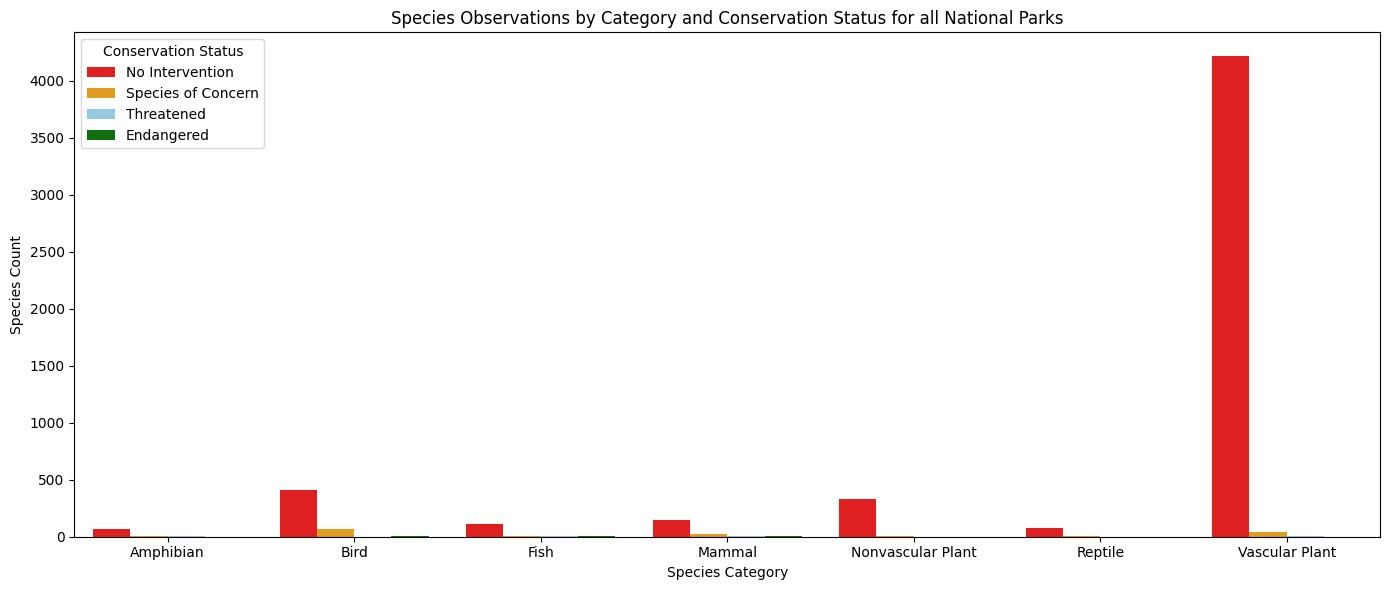

<Figure size 640x480 with 0 Axes>

In [260]:
def generate_summary(df):
    return df.groupby(['category', 'conservation_status'])['scientific_name'].nunique().reset_index(name='species_count')

species_count = generate_summary(biodiversity)


status_order = ['No Intervention', 'Species of Concern', 'Threatened', 'Endangered']
custom_palette = {'No Intervention': 'red', 'Species of Concern': 'orange', 'Threatened': 'skyblue', 'Endangered': 'green'}

plt.figure(figsize=(14, 6))
sns.barplot(data=species_count, x='category', y='species_count',
            hue='conservation_status', hue_order=status_order, palette=custom_palette)
plt.title('Species Observations by Category and Conservation Status for all National Parks')
plt.ylabel('Species Count')
plt.xlabel('Species Category')
plt.legend(title='Conservation Status')
plt.tight_layout()
plt.show()
plt.clf()

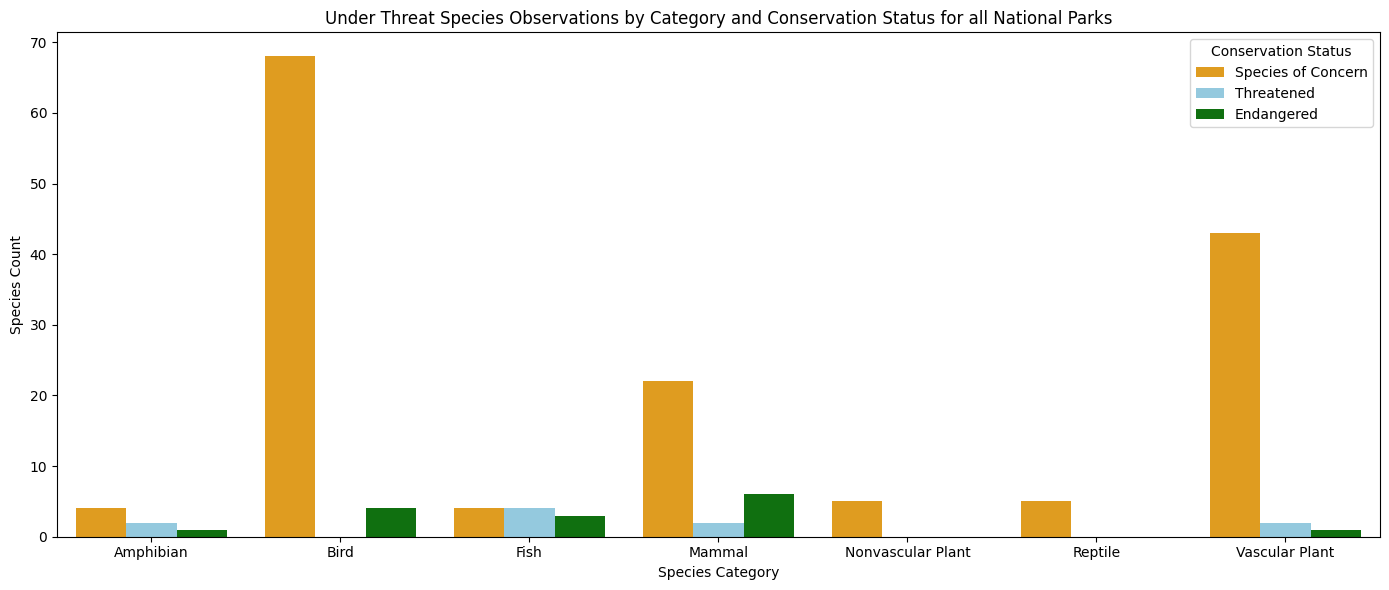

<Figure size 640x480 with 0 Axes>

In [290]:
under_threat = species_count[species_count['conservation_status'] != 'No Intervention']

plt.figure(figsize=(14, 6))
sns.barplot(data=under_threat, x='category', y='species_count',
            hue='conservation_status', hue_order=['Species of Concern', 'Threatened', 'Endangered'], palette=custom_palette)
plt.title('Under Threat Species Observations by Category and Conservation Status for all National Parks')
plt.ylabel('Species Count')
plt.xlabel('Species Category')
plt.legend(title='Conservation Status')
plt.tight_layout()
plt.show()
plt.clf()

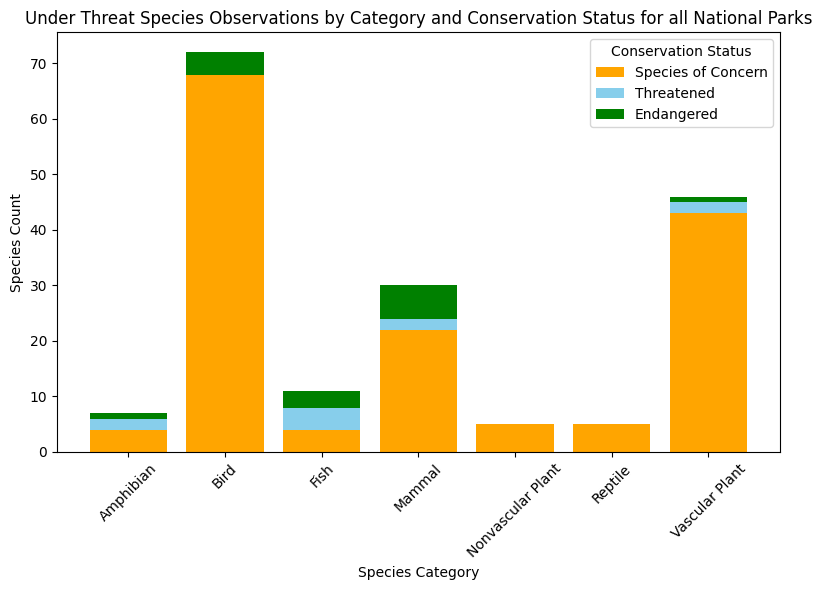

<Figure size 640x480 with 0 Axes>

In [313]:
pivot_under_threat = under_threat.pivot(index='category', columns='conservation_status', values='species_count').fillna(0)
pivot_under_threat = pivot_under_threat[['Species of Concern', 'Threatened', 'Endangered']]
plt.figure(figsize=(8,6))
categories = pivot_under_threat.index
bottom = np.zeros(len(categories))
for status in pivot_under_threat.columns:
    plt.bar(categories, pivot_under_threat[status], bottom=bottom, label=status, color=custom_palette[status])
    bottom += pivot_under_threat[status]
plt.title('Under Threat Species Observations by Category and Conservation Status for all National Parks')
plt.ylabel('Species Count')
plt.xlabel('Species Category')
plt.xticks(rotation=45)
plt.legend(title='Conservation Status')
plt.tight_layout()
plt.show()
plt.clf()

In [262]:
biodiversity['protected'] = (biodiversity['conservation_status'] != 'No Intervention')
protection = biodiversity.groupby(['category', 'protected'])['scientific_name'].nunique().reset_index().pivot(columns='protected', index='category', values='scientific_name').reset_index()
protection.columns = ['category', 'not_protected', 'protected']
protection

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,72
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [324]:
protection['protection percentage'] = (protection['protected']/(protection['not_protected'] + protection['protected']))*100
protection['not protection percentage'] = (protection['not_protected']/(protection['not_protected'] + protection['protected']))*100
protection['protection percentage'] = protection['protection percentage'].round(2)
protection['not protection percentage'] = protection['not protection percentage'].round(2)
protection

,category,not_protected,protected,protection percentage,not protection percentage
0,Amphibian,72,7,8.86,91.14
1,Bird,413,72,14.85,85.15
2,Fish,115,11,8.73,91.27
3,Mammal,146,30,17.05,82.95
4,Nonvascular Plant,328,5,1.50,98.50
5,Reptile,73,5,6.41,93.59
6,Vascular Plant,4216,46,1.08,98.92


## 2) Is there a correlation between the number of observations of a species and its conservation status?

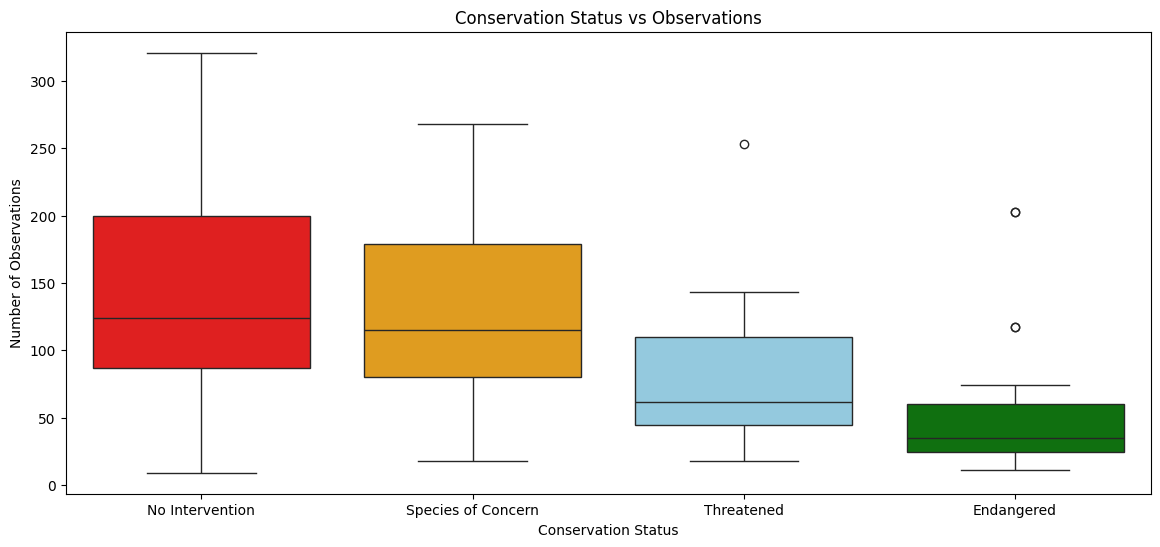

<Figure size 640x480 with 0 Axes>

In [264]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=biodiversity, x='conservation_status', y='observations', hue='conservation_status', legend=False, order=status_order, palette=custom_palette)
plt.title('Conservation Status vs Observations')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Observations')
plt.show()
plt.clf()

In [334]:
endangered = biodiversity[biodiversity['conservation_status'] == 'Endangered']
endangered_above_100 = endangered[endangered['observations'] > 100]
endangered_above_100

,category,scientific_name,common_names,conservation_status,national_park,observations,protected
51,Mammal,Canis lupus,Gray Wolf,Endangered,Yellowstone,203,True
53,Mammal,Canis lupus,Gray Wolf,Endangered,Yosemite,117,True
19687,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,Yellowstone,203,True
19689,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,Yosemite,117,True


## 3) Is there a significant difference between the number organism species under threat?

### Null Hypothesis: There is no association between the organism category and whether a they are under protection.

P-value for the protection status across all organism species: 6.525703368905795e-86




C:\Users\sammy\AppData\Local\Temp\ipykernel_5240\2796578292.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  labels = pvals_reordered.applymap(lambda x: f"{x:.3g}" if not pd.isna(x) else "")


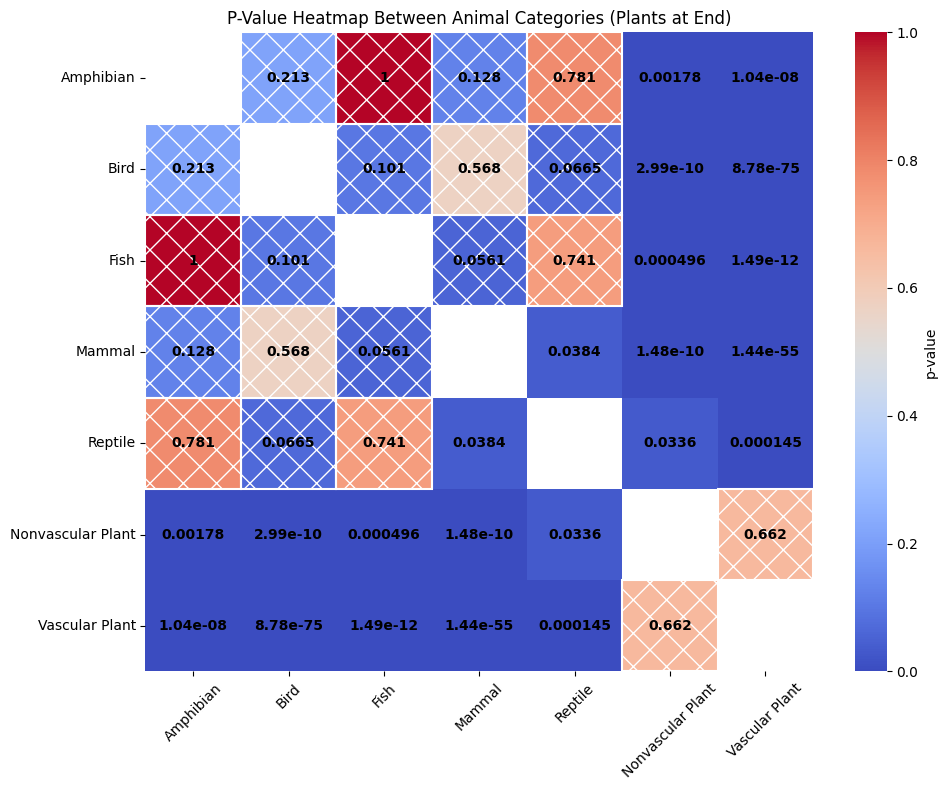

<Figure size 640x480 with 0 Axes>

In [359]:
a = [[7, 72], [72, 413], [11, 115], [30, 146], [5, 328], [5, 73], [46, 4216]]
_, p, _, _ = chi2_contingency(a)
print(f'P-value for the protection status across all organism species: {p}')
print('\n')
def extract_pvalues_only(df):
    categories = df['category'].tolist()
    table = pd.DataFrame(index=categories, columns=categories)

    for cat1, cat2 in combinations(categories, 2):
        protected1 = df.loc[df['category'] == cat1, 'protected'].values[0]
        not_protected1 = df.loc[df['category'] == cat1, 'not_protected'].values[0]
        protected2 = df.loc[df['category'] == cat2, 'protected'].values[0]
        not_protected2 = df.loc[df['category'] == cat2, 'not_protected'].values[0]

        contingency = [[protected1, not_protected1], [protected2, not_protected2]]
        _, pval, _, _ = chi2_contingency(contingency)

        table.loc[cat1, cat2] = pval
        table.loc[cat2, cat1] = pval

    np.fill_diagonal(table.values, np.nan)
    return table.astype(float)
pvals = extract_pvalues_only(protection)

new_order = [cat for cat in pvals.index if 'Plant' not in cat]
new_order += ['Nonvascular Plant', 'Vascular Plant']

pvals_reordered = pvals.loc[new_order, new_order]

labels = pvals_reordered.applymap(lambda x: f"{x:.3g}" if not pd.isna(x) else "")

plt.figure(figsize=(10, 8))
ax = sns.heatmap(pvals_reordered, annot=False, cmap="coolwarm", cbar_kws={'label': 'p-value'})

plt.title('P-Value Heatmap Between Animal Categories (Plants at End)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

for i in range(pvals_reordered.shape[0]):
    for j in range(pvals_reordered.shape[1]):
        val = pvals_reordered.iloc[i, j]
        if pd.isna(val):
            continue

        ax.text(j + 0.5, i + 0.5, labels.iloc[i, j],
                ha='center', va='center', color='black', fontsize=10, fontweight='bold')

        if val > 0.05:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False,
                                       hatch='X', edgecolor='white', linewidth=1.5))

plt.tight_layout()
plt.show()
plt.clf()

In [370]:
print('Conclusions')
print('\n')
print('1) Which species are most under threat and how are they distributed across the parks?')
print('- \"At first glance, the vast majority of species have a conservation status of \'No Intervention\' (as low as 82.95% (for Mammals) and as high as 98.92% (for Vascular Plants)), and so are not protected as they are not under threat. Of the protected species, Mammals and Birds appear the most under threat, with protection percentages of 17.05% and 14.85% respectively. Interestingly, looking at the bar graphs, whilst mammals have a higher proportion of species under threat, birds have a higher absolute count of species under threat, with the mast vajority of these being \'Species of Concern\' however, and not \'Endangered\'. Something else to note is that whilst Vascular Plants have the lowest proportion of protected species, looking at their count on the graph shows that they boast the 2nd highest absolute number of under threat species, again with most of their numbers being in the \'Species of Concern\' category. This appears to be the case with all organism categories, with Reptiles and Nonvascular Plants only possessing species with this status. Fish, however, seem to have an equal amount of species with \'Species of Concern\', \'Threatened\', and \'Endangered\' conservation status.\"')
print('\n')
print('2) Is there a correlation between the number of observations of a species and its conservation status?')
print('- "Looking at the boxplot, it appears that there is a visible decrease in observations of species as their conservation status becomes more severe and endangered. This is to be expected, as the more endangered a species is, the less likely one is to see it in the wild. This calls to prioritise their monitoring for conservation and preventing extinction of that species. For the \'Endangered\' species on this boxplot, there appears to be two great outliers, having observations around 100 and 200 across the 7 day period, whilst still being classified as endangered. Looking further into the data shows that this particular species is the Grey Wolf (Canis Lupis), observed in Yellowstone and Yosemite National Park, indicating that whilst its numbers appears to be high at first glance, it must have decreased significantly over the years, and so this should not be mistaken as a species not under threat, and so extra prevention methods may need to be deployed to prevent this particular species from going extinct."')
print('\n')
print('3) Is there a significant difference between organism categories under threat?')
print('- "Across all organism categories as a whole, there appears to be very strong evidence to suggest that there is indeed an association between categories and their conservation status. This is shown by the very small p-value of around 6.5 x 10^-86, which is very strong evidence against the null hypothesis that there is no association. However, by comparing each organism category individually with each other, this yields some interesting results. For example, looking at the heat map, 10/21 (almost half) of p-values between individual categories are above the significance threshold of 0.05, meaning there is almost a 50/50 split of whether to reject the null hypothesis or not. Most noteably, between Amphibians and Fish, there is a p-value of 1, meaning there is, theoretically, the strongest evidence to accept the null hypothesis that there is no association between these two categories and their conservation status. This could be due to their shared aquatic/semi-aquatic habitats, or similar ecological threat profiles. Looking closer at the heatmap shows that animal categories, for the most part, only show a significant p-value (below the threshold of 0.05), and so significant evidence to reject the null hypothesis, when compared with plant categories, and vice versa. This suggests that animals and plants are not protected equally, as potentially one gets more attention or different conservation treatments, whilst the other might be underepresented. The exceptions to this are the comparisons between Reptiles and Mammals, which yielded a p-value of about 0.0384, and Reptiles and Nonvascular Plants, which yielded a p-value of about 0.0336. This could point to the evidence that Reptiles are not as equally protected as the rest of the animals, potentially yeilding extra protection methods."')

Conclusions


1) Which species are most under threat and how are they distributed across the parks?
- "At first glance, the vast majority of species have a conservation status of 'No Intervention' (as low as 82.95% (for Mammals) and as high as 98.92% (for Vascular Plants)), and so are not protected as they are not under threat. Of the protected species, Mammals and Birds appear the most under threat, with protection percentages of 17.05% and 14.85% respectively. Interestingly, looking at the bar graphs, whilst mammals have a higher proportion of species under threat, birds have a higher absolute count of species under threat, with the mast vajority of these being 'Species of Concern' however, and not 'Endangered'. Something else to note is that whilst Vascular Plants have the lowest proportion of protected species, looking at their count on the graph shows that they boast the 2nd highest absolute number of under threat species, again with most of their numbers being in the 'Species of 